In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Time Series Evaluation:
- **Traditional train/test split**
    - After some predictions the uncertanty is added and the prediction is stabilizing!  
    - This is asking to predict sth that happens very far in the future!
- **Rolling Forecast Origin** (One prediction each training)
    - There is a fit each new prediction, this has better results usually!
    - **General idea:** predict one  each time!
    - Train on  1 to k-3 and predict for k-2
    - Train on  1 to k-2 and predict for k-1
    - Train on  1 to k-1 and predict for k
    - Average all predictions

# Autocorrelation vs Partial Autocorrelation

## Example:
- S1 (AVG. Sales in January)
- S2 (AVG. Sales in February)
- S3 (AVG. Sales in March)


## ACF vs PACF
ACF = CORR(S1,S3) = PEARSONCORR(S1,S3)   

**However**, this is influenced by other cofounders!

eg.
S1 influence S2, and S2 influences S3

### PACF

**PACF takes care only about the direct relationships!**
- Why this is useful?  
- eg. i want to know if S1 is a good predictor for S3  
using  ACF i can get a really high values but this can be due to the undirect correlations
instead using PACF i estimate only the direct effect!

How the PACF is estimated?
- Fitting a regression model!

eg. for k = 2

S_t = phi_1 * S1 + phi_2 * S2  [1]

- phi_2 is used for proving that there is a significant relationships between t-2 and t when is over a confidence level

And then the phi_k gives the importance of the state Sk;
Why this is not influenced by other Sj with j != k?
Because the model [1] take into considereation their effects with the corrisponding phi_j




# AR (autoregressive) models

When there is a decaying ACF, we are likely dealing with an Auto-Regressive process

how to build this model?
- use PACF to get which lag to keep (when they are over the confidence level of not being statistically zero)

S_t = Beta0 + Beta1*S1 + Beta4*S4 + ... + Betak*Sk

- all these Si and Betai are taken looking at the significant features for the prediction of S_t fitting the regression model

# Moving Average Model

Here, the idea is the following:
-  I have a mean u
- i have a target yi
- i have an error ei

When MA(1), basically the prediction for time i, is got from adding to the mean  u the  sigma_i * e_i-1

- MA(1) means 1 only error term 
- MA(2) means 2 errors terms (so considering 2 steps in the past)

Still usually we don't have a pure Moving average process, it's a component!

ACF can be used for detecting the number of error terms, and if this is a Moving average model! since i have a decay that is not gradual (after i number of steps it goes to 0)

Also the PACF can be another proof of having a moving average process! if there alternative and decreasing values!

With a simple MA model, after the k steps (since the order = k) i always predict the mean!

# Remarks:
- use ACF  to estimate the q of MA(q)
- use PACF to estimate the k of AR(k)

# White Noise
- How to check if the model is well fit? using the residuals
if they are a white noise signal then no need to try to improve it!

# DEF:
a white noise signal is a time series with:
- mean = 0
- st.dev costant
- corr between LAGS is 0

# Procedure:
how to test ?
- visual tests
- global vs local checks
- check ACF

In [2]:
PATH = "/Users/simoneboesso/Desktop/US_GDP-Time-Series-Forecast/US-GDP/GDPUS_nsa.csv"
df = pd.read_csv(PATH)

In [3]:
print(df.dtypes)

DATE          object
NA000334Q    float64
dtype: object


First, I convert this using the datetime object

In [4]:
df['DATE'] = pd.to_datetime(df['DATE'])
print(df.dtypes)

DATE         datetime64[ns]
NA000334Q           float64
dtype: object


In [5]:
df.set_index('DATE', inplace=True)  # set as the index --> useful for future manipulations

In [6]:
df = df.asfreq(pd.infer_freq(df.index))


In [7]:
df.head()

,NA000334Q
DATE,
1947-01-01,58497.0
1947-04-01,60672.0
1947-07-01,62196.0
1947-10-01,68250.0
1948-01-01,64258.0


In [8]:
df.tail()

,NA000334Q
DATE,
2019-10-01,5528336.0
2020-01-01,5245520.0
2020-04-01,4901784.0
2020-07-01,5323673.0
2020-10-01,5484017.0


In [9]:
from datetime import datetime,timedelta

start_date = datetime(1947,1,1)
end_date = datetime(2020,1,1)
df = df[start_date:end_date]

In [10]:
df.head

<bound method NDFrame.head of             NA000334Q
DATE                 
1947-01-01    58497.0
1947-04-01    60672.0
1947-07-01    62196.0
1947-10-01    68250.0
1948-01-01    64258.0
...               ...
2019-01-01  5132160.0
2019-04-01  5357342.0
2019-07-01  5415390.0
2019-10-01  5528336.0
2020-01-01  5245520.0

[293 rows x 1 columns]>

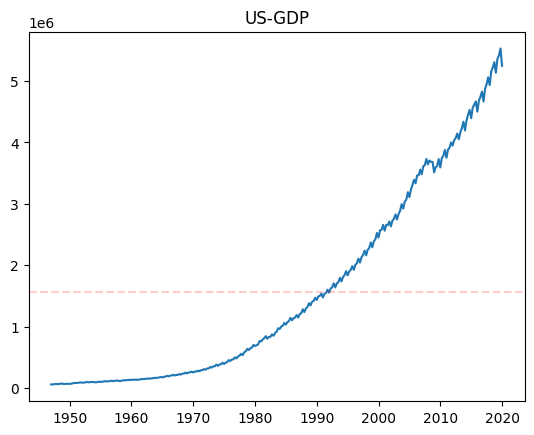

In [11]:
plt.plot(df['NA000334Q'])
plt.axhline(df['NA000334Q'].mean(), color='r', alpha=0.2, linestyle='--')
plt.title("US-GDP")
plt.show()

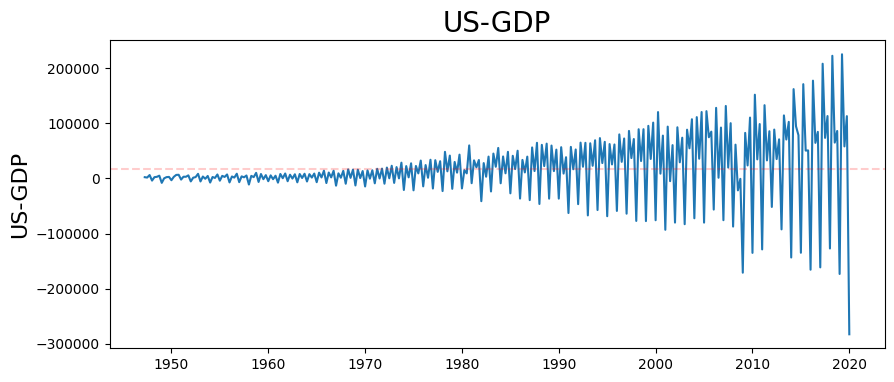

In [12]:
first_diff = df['NA000334Q'].diff()[1:]
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('US-GDP', fontsize=20)
plt.ylabel('US-GDP', fontsize=16)
plt.axhline(first_diff.mean(), color='r', alpha=0.2, linestyle='--')

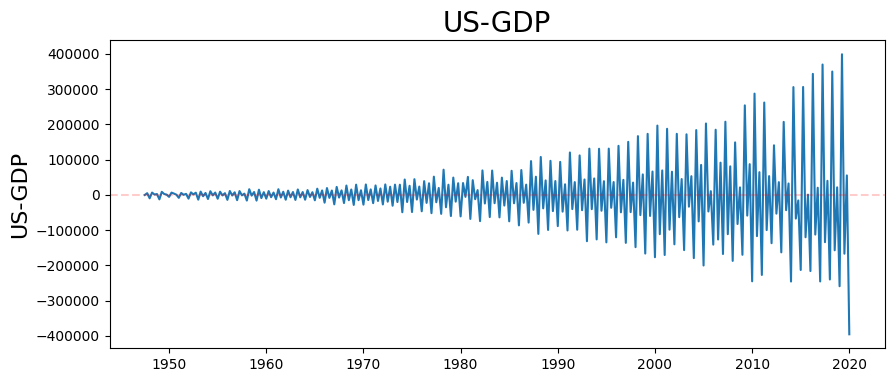

In [13]:
second_diff = first_diff.diff()[1:]
plt.figure(figsize=(10,4))
plt.plot(second_diff)
plt.title('US-GDP', fontsize=20)
plt.ylabel('US-GDP', fontsize=16)
plt.axhline(second_diff.mean(), color='r', alpha=0.2, linestyle='--')

In [14]:
print(second_diff.shape)

(291,)


with a differentiation is way better!

# ACF vs PACF

Let's perform ACF And PACF
- ACF can be used for estimating the q of MA(q)
- PACF can be used for estimating the k of AR(k)

(25,)


<BarContainer object of 25 artists>

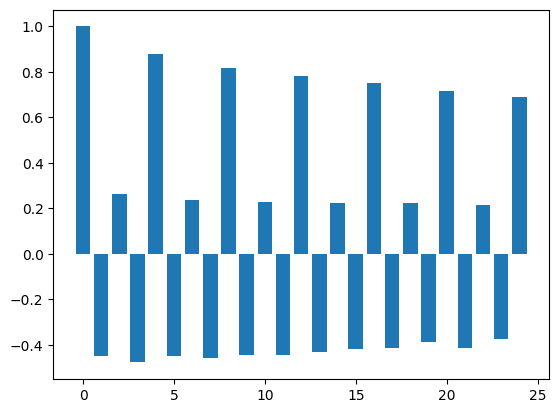

In [15]:
from statsmodels.tsa.stattools import acf, pacf
num_lags = 25
acf_vals = acf(first_diff)
print(acf_vals.shape)
plt.bar(range(num_lags), acf_vals[:num_lags])

<BarContainer object of 25 artists>

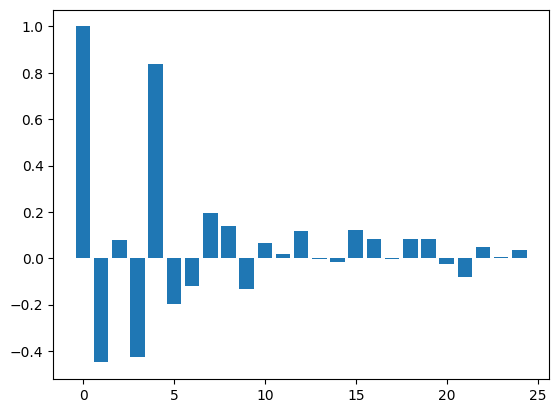

In [16]:
pacf_vals = pacf(first_diff)
plt.bar(range(num_lags), pacf_vals[:num_lags])

# First approach:
- tradition Train/Test split

In [17]:
train_end = datetime(2015,1,1)
test_end = datetime(2020,1,1)

train_data = df[:train_end]
train_data  = np.log(train_data)
test_data = df[train_end + timedelta(days=1):test_end]
test_data = np.log(test_data)

In [18]:
train_data.shape

(273, 1)

In [19]:
test_data.shape

(20, 1)

In [20]:
from pmdarima.arima import auto_arima
#Autoarima gives us best model suited for the data (GRID-SEARCH)
# p - number of autoregressive terms (AR)
# q - Number of moving avergae terms (MA)
# d - number of non-seasonal differences
#p, d, q represent non-seasonal components
#P, D, Q represent seasonal components
arima_model = auto_arima(train_data, start_p = 1, d=1, start_q = 1, 
                          max_p = 5, max_q = 5, max_d=5, m = 12, 
                          start_P = 0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                          seasonal = True, 
                          trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True, n_fits=50) 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=-1386.432, Time=0.09 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-1380.148, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-1446.697, Time=0.77 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-1453.446, Time=0.61 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-1386.697, Time=0.09 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-1453.445, Time=1.08 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-1454.649, Time=1.93 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=-1451.515, Time=2.61 sec
 ARIMA(0,1,1)(0,1,3)[12]             : AIC=-1452.847, Time=7.18 sec
 ARIMA(0,1,1)(1,1,3)[12]             : AIC=-1451.461, Time=5.89 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=-1450.968, Time=0.96 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=-1454.831, Time=2.92 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-1453.147, Time=0.92 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=-1451.719, Time=4.04 sec
 ARIM

In [35]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order = (1,1,0),seasonal_order=(0,1,2,12))

In [36]:
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:                             NA000334Q   No. Observations:                  273
Model:             ARIMA(1, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood                 731.853
Date:                               Fri, 26 Apr 2024   AIC                          -1455.707
Time:                                       16:29:35   BIC                          -1441.464
Sample:                                   01-01-1947   HQIC                         -1449.981
                                        - 01-01-2015                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1429      0.050      2.878      0.004       0.046       0.240
ma.S.L12      -0.6183      0.050    -12.252      0.000      -0.717      -0.519
ma.S.L24       0.1476      0.059      2.492      0.013       0.032       0.264
sigma2         0.0002   1.35e-05     15.327      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                50.26
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                             0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Results:
- here the fitting of 5 coefficients for the AR model
- the fitting of 2 coefficients for the MA model

basically here the ma.L1 is rejected since it has p value more than the 0.05 confidence level!

# Evaluating the predictions!

In [37]:
test_data.shape

(20,)

In [59]:
test_data.head()

DATE
2015-04-01    15.333798
2015-07-01    15.344791
2015-10-01    15.355726
2016-01-01    15.319574
2016-04-01    15.358224
Freq: QS-OCT, Name: NA000334Q, dtype: float64

In [38]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [39]:
pred_start_date

Timestamp('2015-04-01 00:00:00')

In [40]:
pred_end_date

Timestamp('2020-01-01 00:00:00')

In [41]:
preds = model_fit.predict(start=pred_start_date,end = pred_end_date)
preds.shape

(20,)

In [42]:
preds_array = np.array(preds)
preds_array.shape

(20,)

In [43]:
test_data = test_data.squeeze()

In [44]:
test_residuals = test_data - preds

In [45]:
test_residuals

DATE
2015-04-01    0.012572
2015-07-01    0.016805
2015-10-01    0.002946
2016-01-01   -0.005206
2016-04-01   -0.001756
2016-07-01    0.000506
2016-10-01   -0.007771
2017-01-01   -0.010358
2017-04-01    0.000406
2017-07-01    0.003816
2017-10-01    0.010234
2018-01-01    0.010798
2018-04-01    0.030496
2018-07-01    0.035874
2018-10-01    0.029257
2019-01-01    0.023119
2019-04-01    0.032468
2019-07-01    0.030458
2019-10-01    0.025847
2020-01-01    0.005573
Freq: QS-OCT, dtype: float64

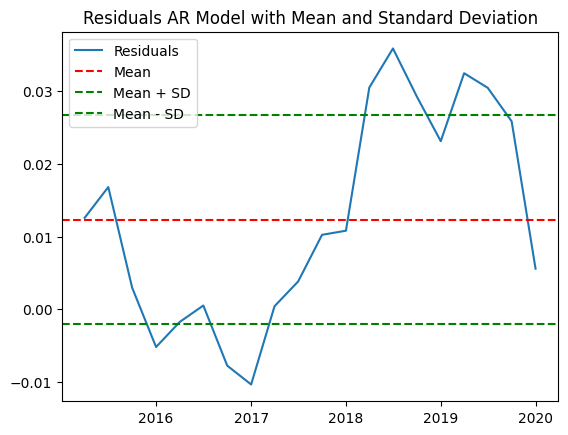

In [46]:
plt.plot(test_residuals, label='Residuals')
plt.axhline(np.mean(test_residuals), color='r', linestyle='--', label='Mean')
plt.axhline(np.mean(test_residuals) + np.std(test_residuals), color='g', linestyle='--', label='Mean + SD')
plt.axhline(np.mean(test_residuals) - np.std(test_residuals), color='g', linestyle='--', label='Mean - SD')

plt.legend()
plt.title("Residuals AR Model with Mean and Standard Deviation")
plt.show()

this  residual plot shows a pattern so there is sth in the data that was not captured! Probably the seasonality!

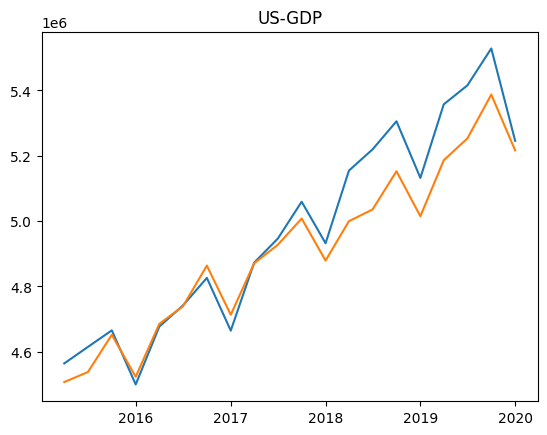

In [47]:
plt.plot(np.exp(test_data))
plt.plot(np.exp(preds))
plt.title("US-GDP")
plt.show()

Here also the previous idea of the evaluation using one only fit!

In [60]:
test_data.head()

DATE
2015-04-01    15.333798
2015-07-01    15.344791
2015-10-01    15.355726
2016-01-01    15.319574
2016-04-01    15.358224
Freq: QS-OCT, Name: NA000334Q, dtype: float64

In [62]:
MAE = round(np.mean(abs(test_residuals/test_data)),4)
MAE

0.001

In [63]:
MSE = np.sqrt(np.mean(test_residuals**2))
MSE

0.01893645322830645

# Rolling window Approach!

In [89]:
'''  This create the rolling window!
'''
predictions_rolling = pd.Series()
for end_date in test_data.index:
    train_data = df[:end_date - timedelta(days=1)]    # log transform
    train_data = np.log(train_data)   
    model = ARIMA(train_data, order = (1,1,0),seasonal_order=(0,1,2,12))
    model_fit = model.fit()
    pred = model_fit.predict(end_date)
    predictions_rolling.loc[end_date] = pred.loc[end_date]    


/Users/simoneboesso/Desktop/nuclei-segmentation/nuclei/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/simoneboesso/Desktop/nuclei-segmentation/nuclei/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [90]:
test_residuals = test_data - predictions_rolling

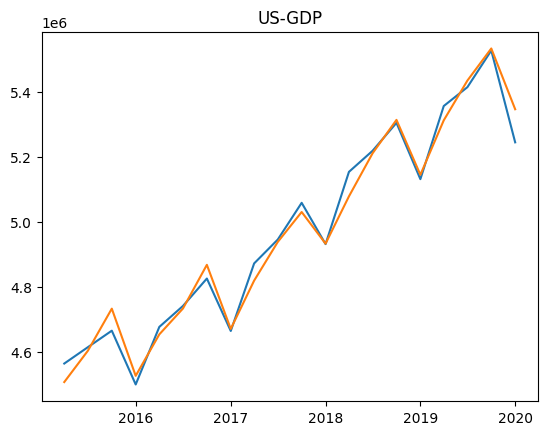

In [92]:
plt.plot(np.exp(test_data))
plt.plot(np.exp(predictions_rolling))
plt.title("US-GDP")
plt.show()

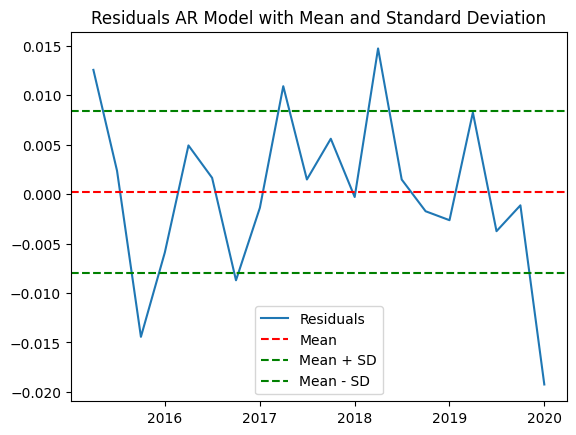

In [91]:
plt.plot(test_residuals, label='Residuals')
plt.axhline(np.mean(test_residuals), color='r', linestyle='--', label='Mean')
plt.axhline(np.mean(test_residuals) + np.std(test_residuals), color='g', linestyle='--', label='Mean + SD')
plt.axhline(np.mean(test_residuals) - np.std(test_residuals), color='g', linestyle='--', label='Mean - SD')
plt.legend()
plt.title("Residuals AR Model with Mean and Standard Deviation")
plt.show()